In [1]:
# 패키지, 데이터 불러오기 
import pandas as pd    # 판다스 패키지 불러오기 
import numpy as np     # 넘파이 패키지 불러오기 
import seaborn as sns  # 시본 패키지 불러오기
import missingno as msno # 미싱고 패키지 불러오기
import matplotlib as mpl
import matplotlib.pyplot as plt  # 맷플랏 패키지 불러오기 
from IPython.display import Image # 아이파이썬 패키지 불러오기 

plt.rc('font', family='AppleGothic') # 맥 OS 폰트 설정 
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정

In [2]:
# 데이터 불러오기 
# 19.07 ~ 19.08
# 20.07 ~ 20.08
df_200708 = pd.read_csv('datas/seoul_share_bike_2020.07~08.csv', encoding='cp949')
df_19_08_01 = pd.read_csv('datas/seoul_share_bike_201908_1.csv', encoding='cp949')
df_19_08_02 = pd.read_csv('datas/seoul_share_bike_201908_2.csv', encoding='cp949')
df_19_08_03 = pd.read_csv('datas/seoul_share_bike_201908_3.csv', encoding='cp949')
df_19_07_01 = pd.read_csv('datas/seoul_share_bike_201907_1.csv', encoding='cp949')
df_19_07_02 = pd.read_csv('datas/seoul_share_bike_201907_2.csv', encoding='cp949')
df_19_07_03 = pd.read_csv('datas/seoul_share_bike_201907_3.csv', encoding='cp949')

bike_1907_01 = df_19_07_01.copy()
bike_1907_02 = df_19_07_02.copy()
bike_1907_03 = df_19_07_03.copy()
bike_1908_01 = df_19_08_01.copy()
bike_1908_02 = df_19_08_02.copy()
bike_1908_03 = df_19_08_03.copy()
bike_200708 = df_200708.copy()

데이터이터 뒤죽박죽 따로 있거나 합쳐져 있습니다. 먼저 합칠 것은 합치고 분리할 것은 분리할 작업을 진행하겠습니다.

In [3]:
# 19년 07월 분리된 데이터 합치기
frames = [bike_1907_01, bike_1907_02, bike_1907_03]
bike_1907 = pd.concat(frames)
bike_1907

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-21789,2019-07-02 08:35:17,646,장한평역 1번출구 (국민은행앞),4,2019-07-02 08:42:31,3,중랑센터,2,6,1350.0
1,SPB-22363,2019-07-03 08:35:06,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 08:42:28,3,중랑센터,2,7,1160.0
2,SPB-24965,2019-07-03 08:46:07,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 09:09:44,3,중랑센터,14,23,1270.0
3,SPB-21930,2019-07-04 08:49:57,646,장한평역 1번출구 (국민은행앞),4,2019-07-04 09:04:17,3,중랑센터,14,14,1290.0
4,SPB-17709,2019-07-05 08:45:03,529,장한평역 8번 출구 앞,12,2019-07-05 09:11:47,3,중랑센터,14,26,1200.0
...,...,...,...,...,...,...,...,...,...,...,...
482606,SPB-20127,2019-07-19 07:41:34,240,문래역 4번출구 앞,8,2019-07-19 07:51:55,9998,영남주차장 정비센터,10,9,480.0
482607,SPB-23276,2019-07-19 07:50:48,832,이촌1동 주민센터 뒤,8,2019-07-19 08:32:51,9998,영남주차장 정비센터,12,40,8840.0
482608,SPB-17321,2019-07-22 12:43:22,266,영등포청과시장 사거리,7,2019-07-22 13:07:29,9998,영남주차장 정비센터,14,23,3320.0
482609,SPB-22044,2019-07-22 12:43:13,266,영등포청과시장 사거리,9,2019-07-22 13:08:53,9998,영남주차장 정비센터,4,25,2960.0


In [38]:
# 분리되었던 19년 07월 합친 파일 csv 파일로 저장
bike_1907.to_csv('seoul_share_bike_201907.csv', index=False)

In [4]:
# 합친 파일로 다시 출력 
bike_1907 = pd.read_csv('seoul_share_bike_201907.csv')
bike_1907

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-21789,2019-07-02 08:35:17,646,장한평역 1번출구 (국민은행앞),4,2019-07-02 08:42:31,3,중랑센터,2,6,1350.0
1,SPB-22363,2019-07-03 08:35:06,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 08:42:28,3,중랑센터,2,7,1160.0
2,SPB-24965,2019-07-03 08:46:07,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 09:09:44,3,중랑센터,14,23,1270.0
3,SPB-21930,2019-07-04 08:49:57,646,장한평역 1번출구 (국민은행앞),4,2019-07-04 09:04:17,3,중랑센터,14,14,1290.0
4,SPB-17709,2019-07-05 08:45:03,529,장한평역 8번 출구 앞,12,2019-07-05 09:11:47,3,중랑센터,14,26,1200.0
...,...,...,...,...,...,...,...,...,...,...,...
2082606,SPB-20127,2019-07-19 07:41:34,240,문래역 4번출구 앞,8,2019-07-19 07:51:55,9998,영남주차장 정비센터,10,9,480.0
2082607,SPB-23276,2019-07-19 07:50:48,832,이촌1동 주민센터 뒤,8,2019-07-19 08:32:51,9998,영남주차장 정비센터,12,40,8840.0
2082608,SPB-17321,2019-07-22 12:43:22,266,영등포청과시장 사거리,7,2019-07-22 13:07:29,9998,영남주차장 정비센터,14,23,3320.0
2082609,SPB-22044,2019-07-22 12:43:13,266,영등포청과시장 사거리,9,2019-07-22 13:08:53,9998,영남주차장 정비센터,4,25,2960.0


In [4]:
# 19년 07월 데이터 행열 길이 확인
bike_1907.shape

(2082611, 11)

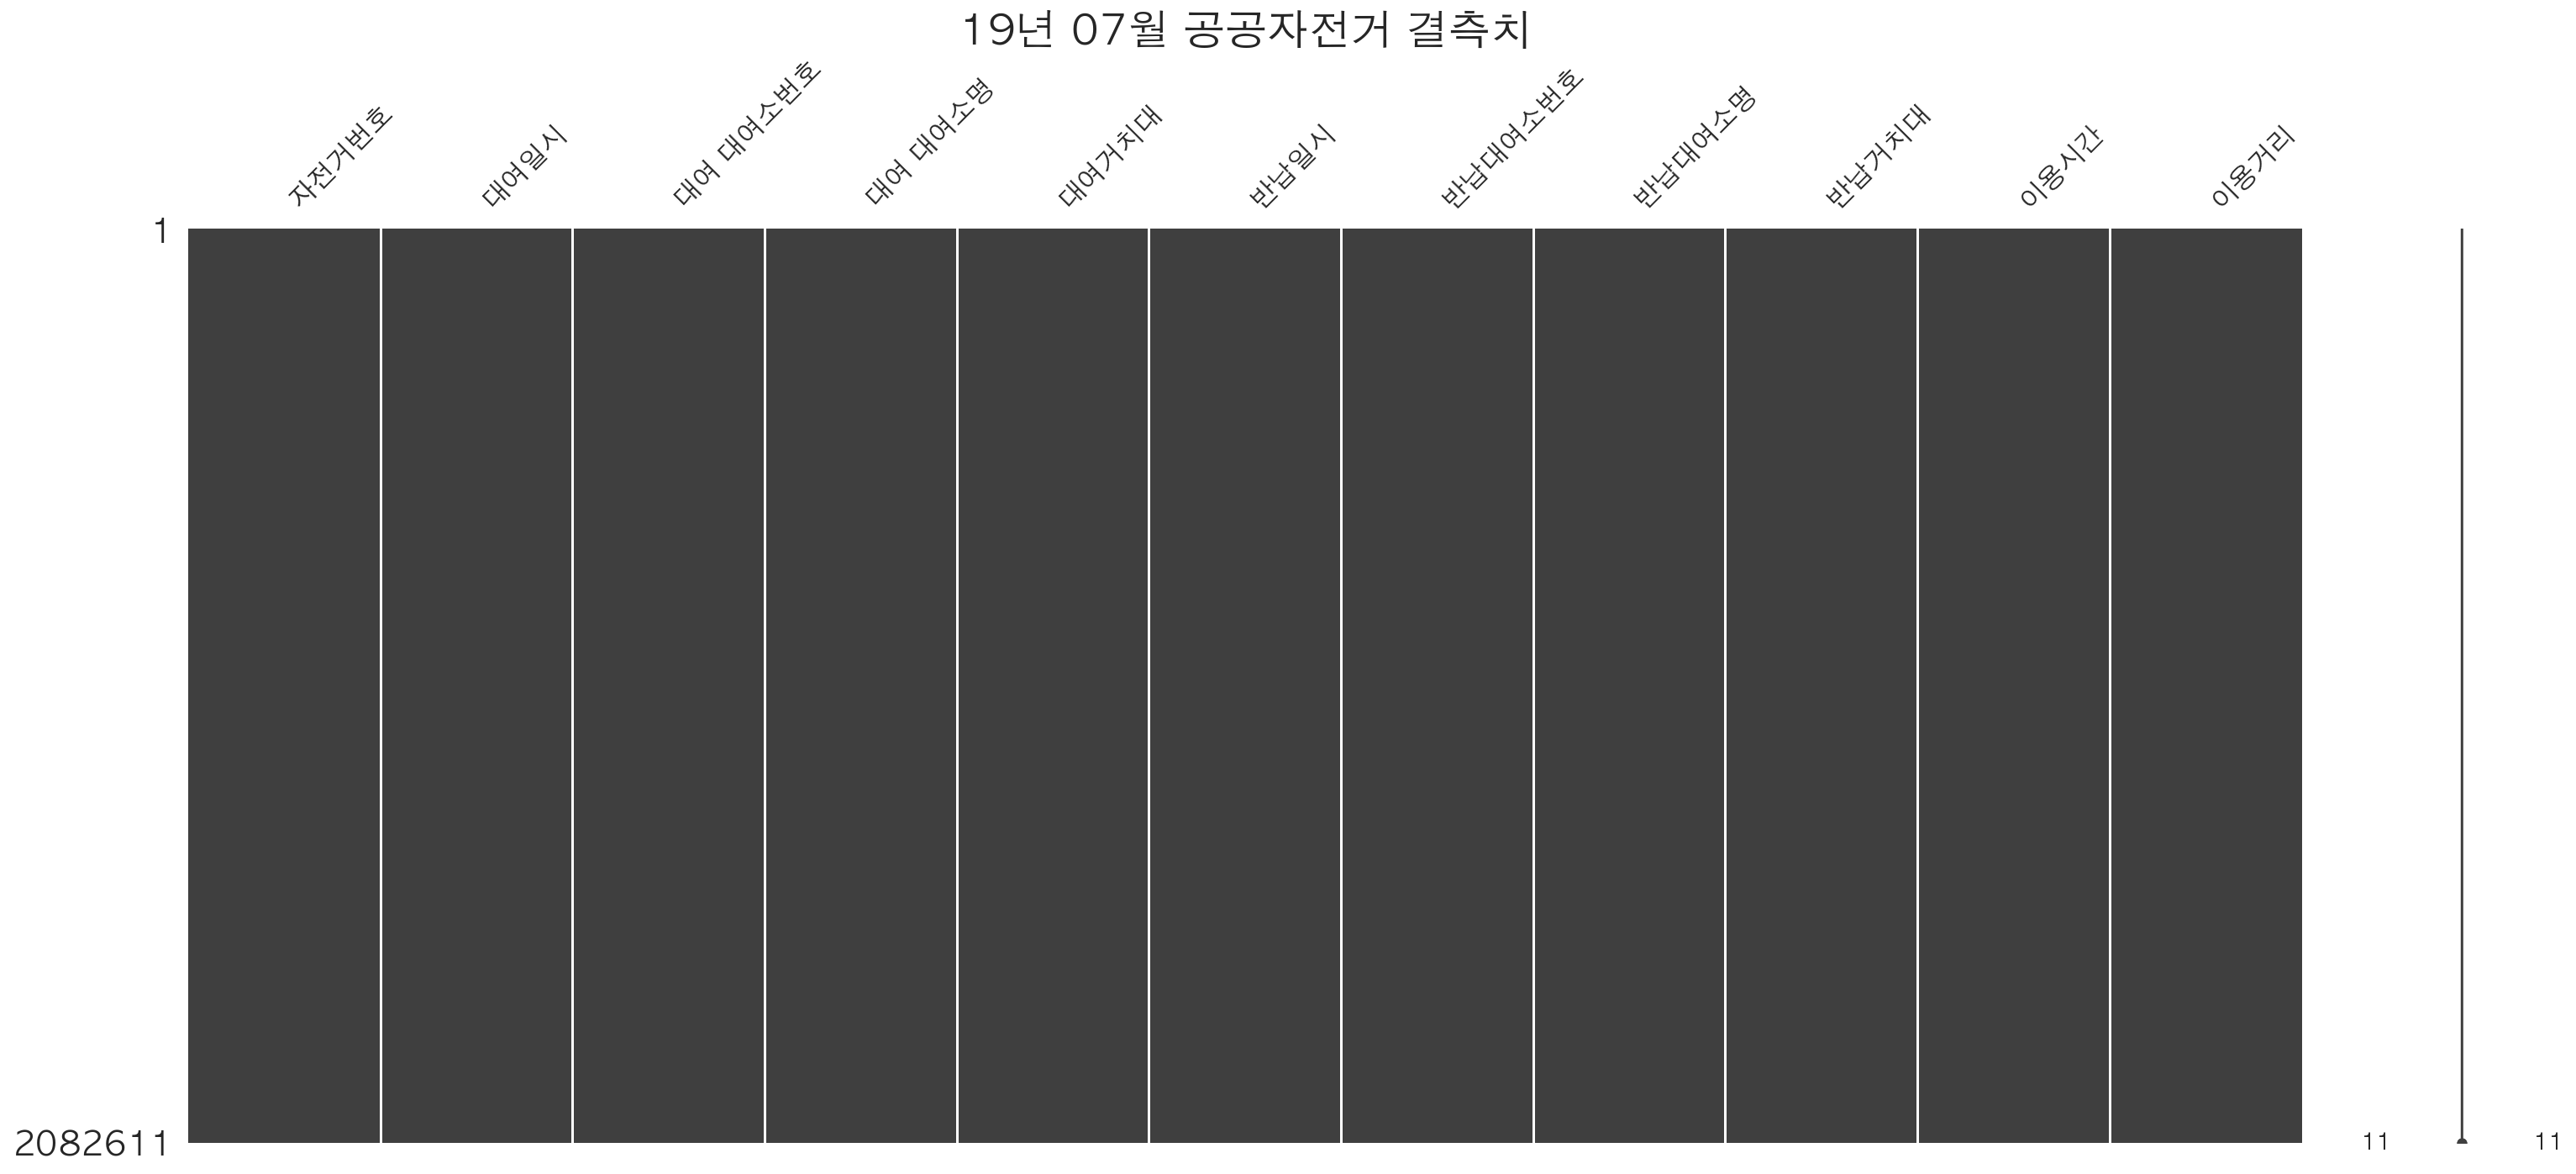

In [5]:
# 19년 07월 데이터 결측치 그래프로 확인 (시각화)
msno.matrix(bike_1907)
plt.title('19년 07월 공공자전거 결측치', fontsize=25)
plt.show()

In [6]:
# 결측치 현황 - 이 데이터는 결측치가 없음
bike_1907.isna().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

In [7]:
# 19년 07월 공공자전거 데이터 정보 
bike_1907.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082611 entries, 0 to 482610
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   int64  
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      int64  
 10  이용거리      float64
dtypes: float64(1), int64(5), object(5)
memory usage: 190.7+ MB


In [9]:
# 19년 08월 분리된 데이터 합치기
frames = [bike_1908_01, bike_1908_02, bike_1908_03]
bike_1908 = pd.concat(frames)
bike_1908

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-19492,2019-08-05 08:37:44,646,장한평역 1번출구 (국민은행앞),8,2019-08-05 08:46:27,3,중랑센터,2,8,1360.0
1,SPB-17426,2019-08-05 13:37:38,3,중랑센터,7,2019-08-05 13:41:29,3,중랑센터,7,3,0.0
2,SPB-17846,2019-08-06 08:40:00,646,장한평역 1번출구 (국민은행앞),3,2019-08-06 08:47:56,3,중랑센터,2,7,1380.0
3,SPB-10871,2019-08-07 08:47:40,529,장한평역 8번 출구 앞,11,2019-08-07 09:06:16,3,중랑센터,7,18,1220.0
4,SPB-17833,2019-08-08 08:43:53,646,장한평역 1번출구 (국민은행앞),5,2019-08-08 08:49:12,3,중랑센터,2,4,1330.0
...,...,...,...,...,...,...,...,...,...,...,...
428693,SPB-05938,2019-08-27 09:32:58,99999,영남단말기정비,3,2019-08-27 09:35:55,99999,영남단말기정비,3,2,0.0
428694,SPB-05938,2019-08-27 11:29:56,99999,영남단말기정비,3,2019-08-27 11:35:18,99999,영남단말기정비,3,5,0.0
428695,SPB-22615,2019-08-28 11:24:58,99999,영남단말기정비,2,2019-08-28 11:27:21,99999,영남단말기정비,2,2,0.0
428696,SPB-22615,2019-08-28 12:59:58,99999,영남단말기정비,2,2019-08-28 13:25:14,99999,영남단말기정비,2,25,0.0


In [10]:
# 분리되었던 19년 08월 합친 파일 csv 파일로 저장
bike_1908.to_csv('seoul_share_bike_201908.csv', index=False)

In [11]:
# 합친 파일로 다시 출력 
bike_1908 = pd.read_csv('seoul_share_bike_201908.csv')
bike_1908

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-19492,2019-08-05 08:37:44,646,장한평역 1번출구 (국민은행앞),8,2019-08-05 08:46:27,3,중랑센터,2,8,1360.0
1,SPB-17426,2019-08-05 13:37:38,3,중랑센터,7,2019-08-05 13:41:29,3,중랑센터,7,3,0.0
2,SPB-17846,2019-08-06 08:40:00,646,장한평역 1번출구 (국민은행앞),3,2019-08-06 08:47:56,3,중랑센터,2,7,1380.0
3,SPB-10871,2019-08-07 08:47:40,529,장한평역 8번 출구 앞,11,2019-08-07 09:06:16,3,중랑센터,7,18,1220.0
4,SPB-17833,2019-08-08 08:43:53,646,장한평역 1번출구 (국민은행앞),5,2019-08-08 08:49:12,3,중랑센터,2,4,1330.0
...,...,...,...,...,...,...,...,...,...,...,...
2028693,SPB-05938,2019-08-27 09:32:58,99999,영남단말기정비,3,2019-08-27 09:35:55,99999,영남단말기정비,3,2,0.0
2028694,SPB-05938,2019-08-27 11:29:56,99999,영남단말기정비,3,2019-08-27 11:35:18,99999,영남단말기정비,3,5,0.0
2028695,SPB-22615,2019-08-28 11:24:58,99999,영남단말기정비,2,2019-08-28 11:27:21,99999,영남단말기정비,2,2,0.0
2028696,SPB-22615,2019-08-28 12:59:58,99999,영남단말기정비,2,2019-08-28 13:25:14,99999,영남단말기정비,2,25,0.0


In [12]:
# 19년 08월 데이터 행열 길이 확인 
bike_1908.shape

(2028698, 11)

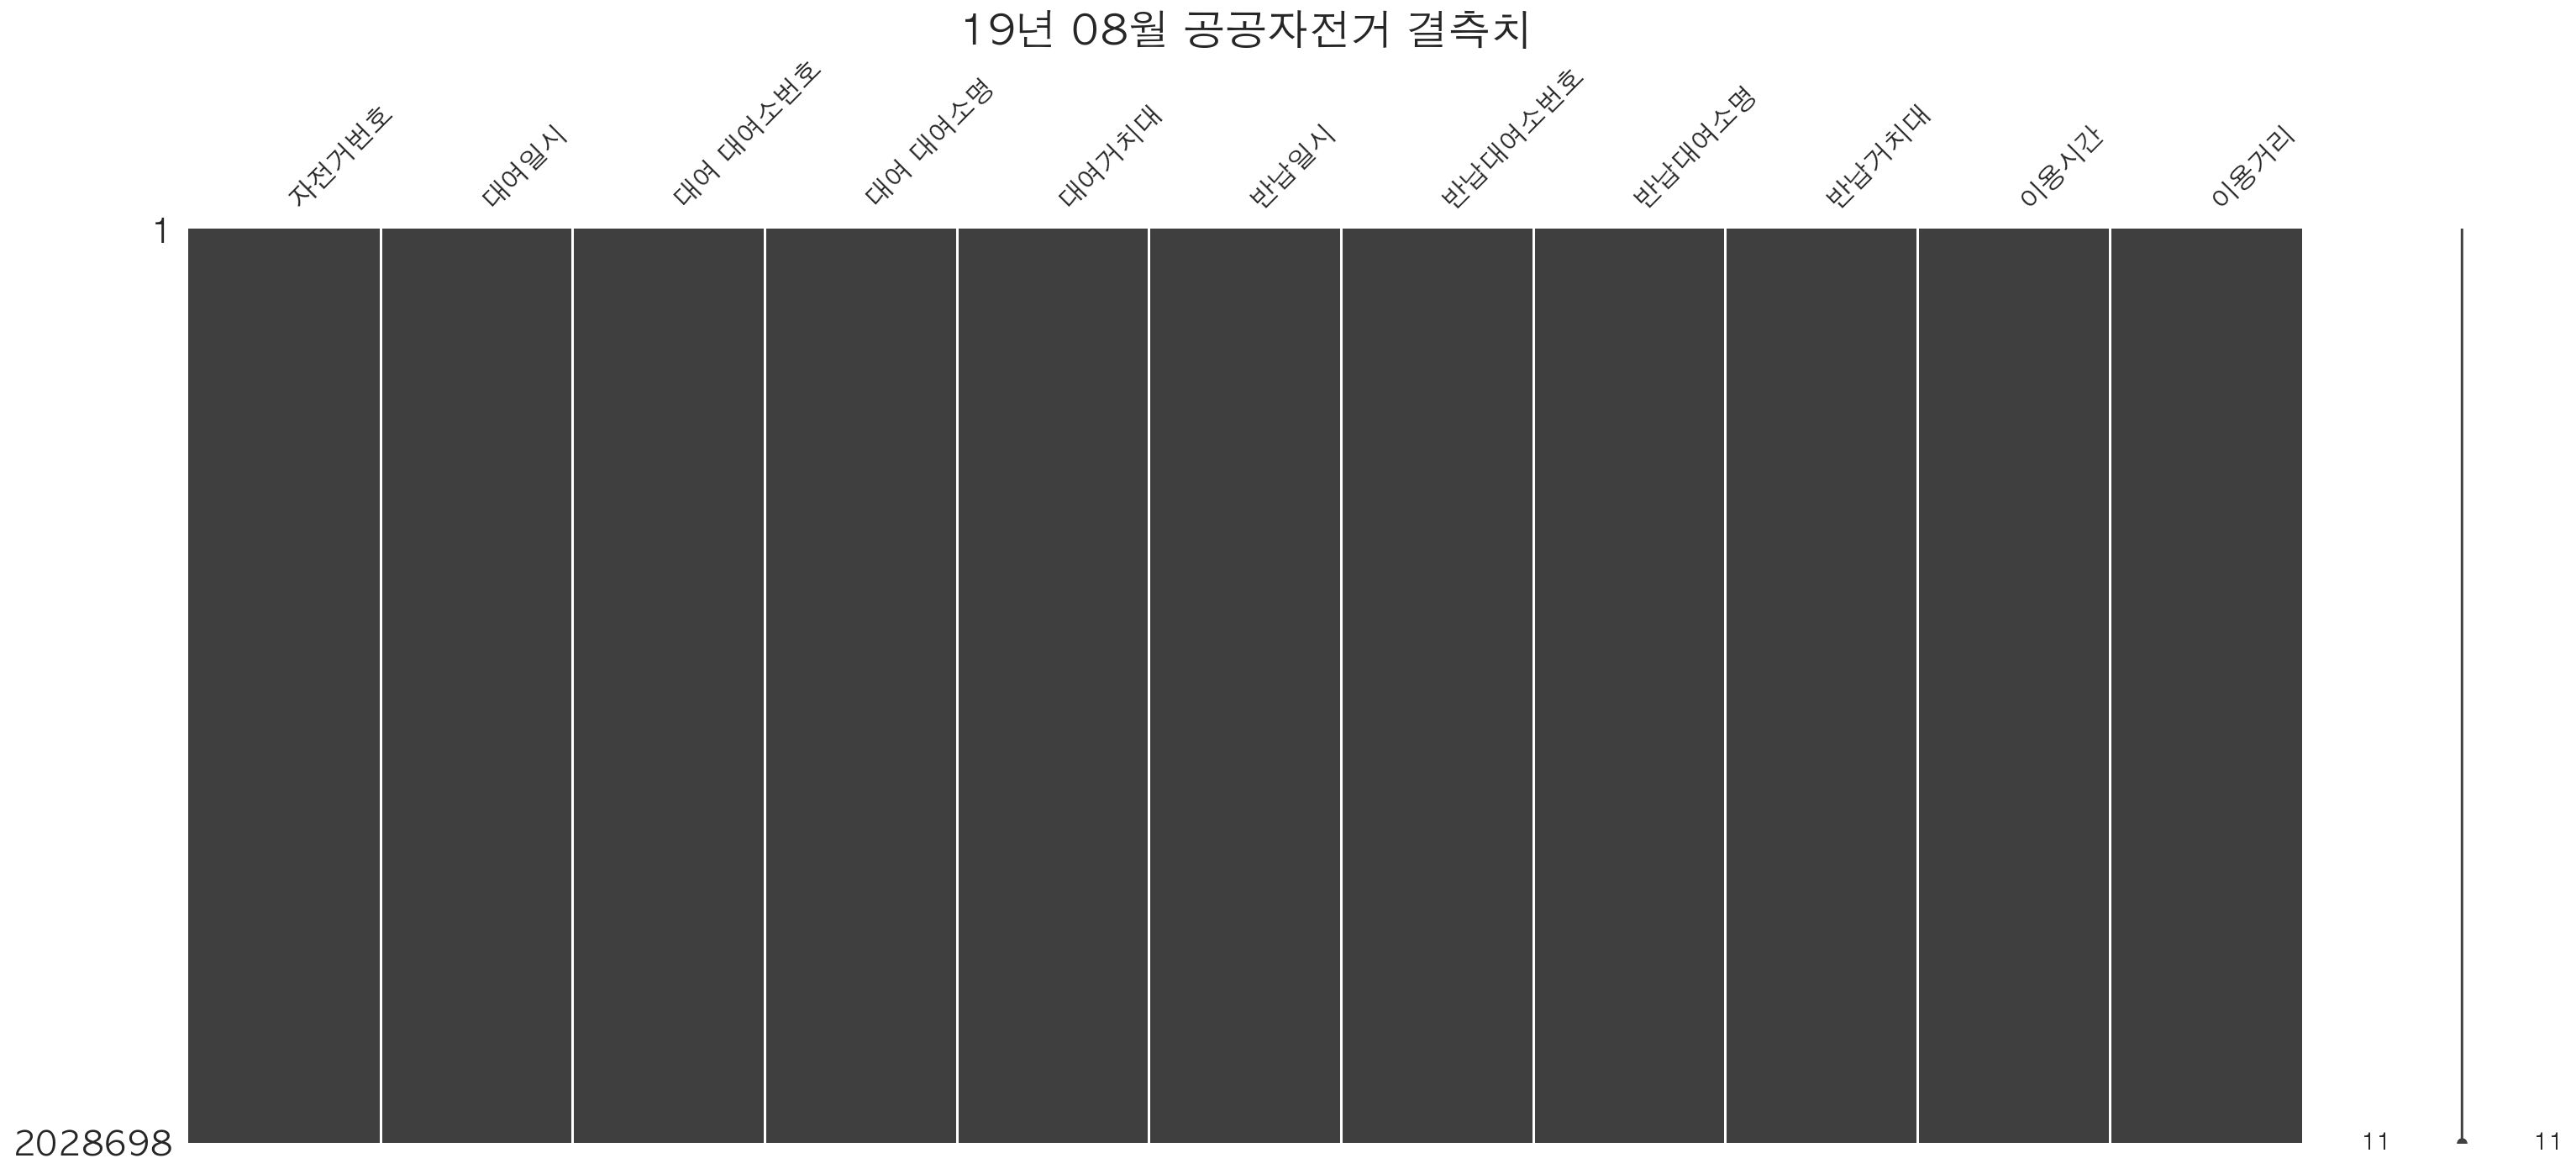

In [13]:
# 19년 08월 데이터 결측치 시각화 
msno.matrix(bike_1908)
plt.title('19년 08월 공공자전거 결측치', fontsize=25)
plt.show()

In [14]:
# 결측치 현황 - 이 데이터는 결측치가 없음
bike_1908.isna().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

In [15]:
# 19년 08월 데이터 정보
bike_1908.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028698 entries, 0 to 2028697
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   int64  
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      int64  
 10  이용거리      float64
dtypes: float64(1), int64(5), object(5)
memory usage: 170.3+ MB


In [16]:
# 20년 07월 08월 공공자전거 데이터 
# 해당 데이터는 합쳐져 있어 분리가 필요함.
bike_200708

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-11402,2020-07-01 00:00:15,610,동대문중 교차로,10,2020-07-01 00:03:23,657,동대문롯데캐슬아파트 앞,1,3,450.00
1,SPB-32502,2020-07-01 00:00:40,1707,도봉구민회관,0,2020-07-01 00:04:30,1775,신원리베르텔 앞,0,4,0.00
2,SPB-33694,2020-07-01 00:00:17,2312,청담역 13번 출구 앞,0,2020-07-01 00:05:10,2313,금원빌딩 앞,0,5,492.63
3,SPB-32022,2020-07-01 00:02:07,2724,(재)FITI시험연구원,0,2020-07-01 00:05:24,2724,(재)FITI시험연구원,0,3,0.00
4,SPB-31475,2020-07-01 00:01:56,1436,영풍마드레빌,0,2020-07-01 00:05:35,1402,금란주차장 앞,0,4,222.39
...,...,...,...,...,...,...,...,...,...,...,...
2254072,SPB-34187,2020-08-31 23:48:10,841,신용산역 1번 출구,0,2020-09-01 03:05:26,2220,반포본동 주민센터 앞,0,197,0.00
2254073,SPB-31279,2020-08-31 21:08:23,1159,서서울모터리움앞,0,2020-09-01 03:13:03,1103,방화역 4번출구앞,0,365,0.00
2254074,SPB-30443,2020-08-31 23:02:51,242,신길선원가와인아파트 앞,0,2020-09-01 03:22:42,241,신길우성1차아파트 앞 공원,0,260,0.00
2254075,SPB-31171,2020-08-31 21:26:58,726,목동3단지 시내버스정류장,0,2020-09-01 03:42:35,243,이앤씨드림타워 앞,0,376,0.00


In [17]:
# 대여 일시 즉 날짜를 기준으로 데이터를 분리할 예정
# 대여일시 컬럼 출력 
bike_200708['대여일시']

0          2020-07-01 00:00:15
1          2020-07-01 00:00:40
2          2020-07-01 00:00:17
3          2020-07-01 00:02:07
4          2020-07-01 00:01:56
                  ...         
2254072    2020-08-31 23:48:10
2254073    2020-08-31 21:08:23
2254074    2020-08-31 23:02:51
2254075    2020-08-31 21:26:58
2254076    2020-08-31 23:05:39
Name: 대여일시, Length: 2254077, dtype: object

In [18]:
# 데이터 타입이 문자열, 해당 데이터 타입을 datatimed 타입으로 변경 
bike_200708['대여일시'] = pd.to_datetime(bike_200708['대여일시'], format = '%Y-%m-%d %H:%M:%S')
bike_200708['대여일시']

0         2020-07-01 00:00:15
1         2020-07-01 00:00:40
2         2020-07-01 00:00:17
3         2020-07-01 00:02:07
4         2020-07-01 00:01:56
                  ...        
2254072   2020-08-31 23:48:10
2254073   2020-08-31 21:08:23
2254074   2020-08-31 23:02:51
2254075   2020-08-31 21:26:58
2254076   2020-08-31 23:05:39
Name: 대여일시, Length: 2254077, dtype: datetime64[ns]

In [19]:
# 20년 7월 데이터 출력 
bike_2007 = bike_200708[(bike_200708['대여일시'] >= "2020-07-01") & (bike_200708['대여일시'] <= '2020-08-01')]
bike_2007

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-11402,2020-07-01 00:00:15,610,동대문중 교차로,10,2020-07-01 00:03:23,657,동대문롯데캐슬아파트 앞,1,3,450.00
1,SPB-32502,2020-07-01 00:00:40,1707,도봉구민회관,0,2020-07-01 00:04:30,1775,신원리베르텔 앞,0,4,0.00
2,SPB-33694,2020-07-01 00:00:17,2312,청담역 13번 출구 앞,0,2020-07-01 00:05:10,2313,금원빌딩 앞,0,5,492.63
3,SPB-32022,2020-07-01 00:02:07,2724,(재)FITI시험연구원,0,2020-07-01 00:05:24,2724,(재)FITI시험연구원,0,3,0.00
4,SPB-31475,2020-07-01 00:01:56,1436,영풍마드레빌,0,2020-07-01 00:05:35,1402,금란주차장 앞,0,4,222.39
...,...,...,...,...,...,...,...,...,...,...,...
1355280,SPB-30851,2020-07-31 23:55:54,3541,커먼그라운드,0,2020-08-01 02:12:26,558,성동광진 교육지원청 앞,0,137,0.00
1355364,SPB-12893,2020-07-31 22:04:13,1021,강일동 리슈빌 빌딩앞,13,2020-08-01 02:17:50,1021,강일동 리슈빌 빌딩앞,13,227,3940.00
1355407,SPB-23671,2020-07-31 23:06:34,926,불광역 8번출구,1,2020-08-01 02:20:16,486,평창동주민센터 앞,1,182,22890.00
1356342,SPB-19903,2020-07-31 23:58:29,1265,문정동 근린공원,1,2020-08-01 03:33:14,2615,테라타워2,14,201,3890.00


In [20]:
# 분리한 7월 데이터 csv파일로 저장하기 
bike_2007.to_csv('seoul_share_bike_202007.csv', index=False)

In [21]:
# 저장한 csv 파일 다시 확인하기 
bike_2007 = pd.read_csv('seoul_share_bike_202007.csv')
bike_2007

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-11402,2020-07-01 00:00:15,610,동대문중 교차로,10,2020-07-01 00:03:23,657,동대문롯데캐슬아파트 앞,1,3,450.00
1,SPB-32502,2020-07-01 00:00:40,1707,도봉구민회관,0,2020-07-01 00:04:30,1775,신원리베르텔 앞,0,4,0.00
2,SPB-33694,2020-07-01 00:00:17,2312,청담역 13번 출구 앞,0,2020-07-01 00:05:10,2313,금원빌딩 앞,0,5,492.63
3,SPB-32022,2020-07-01 00:02:07,2724,(재)FITI시험연구원,0,2020-07-01 00:05:24,2724,(재)FITI시험연구원,0,3,0.00
4,SPB-31475,2020-07-01 00:01:56,1436,영풍마드레빌,0,2020-07-01 00:05:35,1402,금란주차장 앞,0,4,222.39
...,...,...,...,...,...,...,...,...,...,...,...
1353714,SPB-30851,2020-07-31 23:55:54,3541,커먼그라운드,0,2020-08-01 02:12:26,558,성동광진 교육지원청 앞,0,137,0.00
1353715,SPB-12893,2020-07-31 22:04:13,1021,강일동 리슈빌 빌딩앞,13,2020-08-01 02:17:50,1021,강일동 리슈빌 빌딩앞,13,227,3940.00
1353716,SPB-23671,2020-07-31 23:06:34,926,불광역 8번출구,1,2020-08-01 02:20:16,486,평창동주민센터 앞,1,182,22890.00
1353717,SPB-19903,2020-07-31 23:58:29,1265,문정동 근린공원,1,2020-08-01 03:33:14,2615,테라타워2,14,201,3890.00


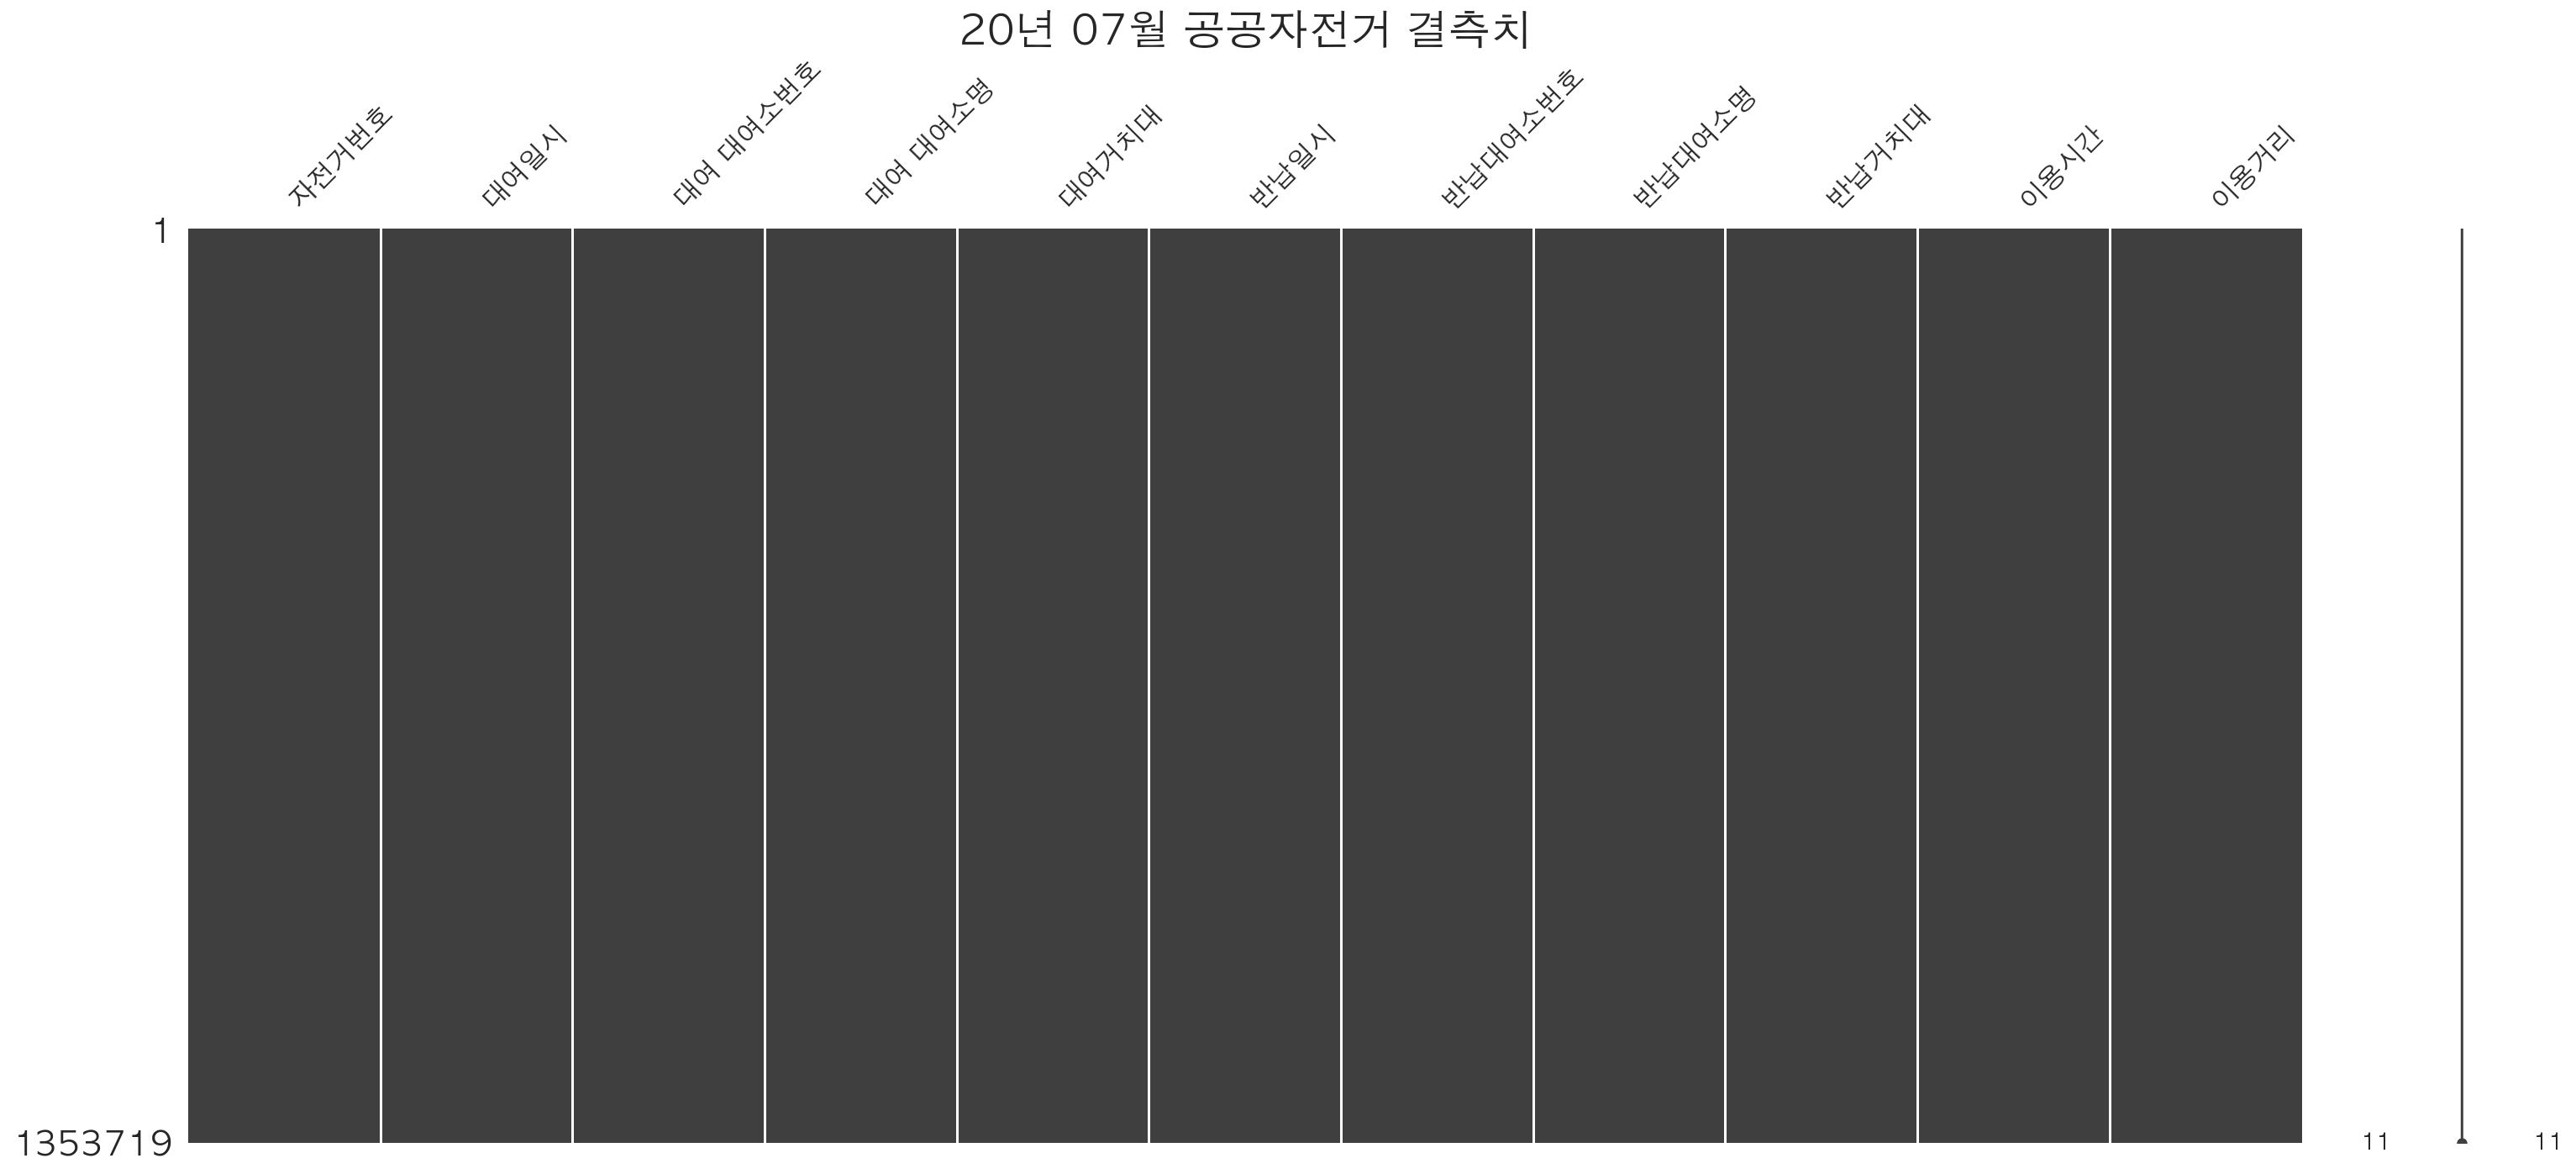

In [22]:
# 20년 07월 데이터 결측치 시각화 
msno.matrix(bike_2007)
plt.title('20년 07월 공공자전거 결측치', fontsize=25)
plt.show()

In [23]:
# 결측치 현황 - 이 데이터는 결측치가 없음
bike_2007.isna().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

In [24]:
# 20년 07월 데이터 정보 
bike_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353719 entries, 0 to 1353718
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   자전거번호     1353719 non-null  object 
 1   대여일시      1353719 non-null  object 
 2   대여 대여소번호  1353719 non-null  int64  
 3   대여 대여소명   1353719 non-null  object 
 4   대여거치대     1353719 non-null  int64  
 5   반납일시      1353719 non-null  object 
 6   반납대여소번호   1353719 non-null  int64  
 7   반납대여소명    1353719 non-null  object 
 8   반납거치대     1353719 non-null  int64  
 9   이용시간      1353719 non-null  int64  
 10  이용거리      1353719 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 113.6+ MB


In [25]:
# 20년 8월 데이터 출력
bike_2008 = bike_200708[(bike_200708['대여일시'] >= "2020-08-01") & (bike_200708['대여일시'] <= '2020-09-01')]
bike_2008

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
1353291,SPB-31470,2020-08-01 00:00:01,714,한국SGI 양천문화회관 앞,0,2020-08-01 00:03:47,740,으뜸공원,0,4,0.0
1353342,SPB-31925,2020-08-01 00:01:23,3533,건대입구역 사거리(롯데백화점),0,2020-08-01 00:06:16,3566,우성4차아파트,0,5,0.0
1353344,SPB-30837,2020-08-01 00:00:34,2634,위례포레샤인아파트 2318동,0,2020-08-01 00:06:20,2633,송파학사 옆,0,6,0.0
1353347,SPB-32237,2020-08-01 00:02:42,1224,아시아지하보도 2번 출구,0,2020-08-01 00:06:25,2645,잠실나들목2(엘스아파트136동),0,4,0.0
1353352,SPB-19413,2020-08-01 00:01:52,2294,두상빌딩 앞,15,2020-08-01 00:06:43,2276,영동1교 (양재천근린공원),2,4,1110.0
...,...,...,...,...,...,...,...,...,...,...,...
2254072,SPB-34187,2020-08-31 23:48:10,841,신용산역 1번 출구,0,2020-09-01 03:05:26,2220,반포본동 주민센터 앞,0,197,0.0
2254073,SPB-31279,2020-08-31 21:08:23,1159,서서울모터리움앞,0,2020-09-01 03:13:03,1103,방화역 4번출구앞,0,365,0.0
2254074,SPB-30443,2020-08-31 23:02:51,242,신길선원가와인아파트 앞,0,2020-09-01 03:22:42,241,신길우성1차아파트 앞 공원,0,260,0.0
2254075,SPB-31171,2020-08-31 21:26:58,726,목동3단지 시내버스정류장,0,2020-09-01 03:42:35,243,이앤씨드림타워 앞,0,376,0.0


In [44]:
# 분리한 8월 데이터 csv파일로 저장하기 
bike_2008.to_csv('seoul_share_bike_202008.csv', index=False)

In [26]:
bike_2008 = pd.read_csv('seoul_share_bike_202008.csv')
bike_2008

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-31470,2020-08-01 00:00:01,714,한국SGI 양천문화회관 앞,0,2020-08-01 00:03:47,740,으뜸공원,0,4,0.0
1,SPB-31925,2020-08-01 00:01:23,3533,건대입구역 사거리(롯데백화점),0,2020-08-01 00:06:16,3566,우성4차아파트,0,5,0.0
2,SPB-30837,2020-08-01 00:00:34,2634,위례포레샤인아파트 2318동,0,2020-08-01 00:06:20,2633,송파학사 옆,0,6,0.0
3,SPB-32237,2020-08-01 00:02:42,1224,아시아지하보도 2번 출구,0,2020-08-01 00:06:25,2645,잠실나들목2(엘스아파트136동),0,4,0.0
4,SPB-19413,2020-08-01 00:01:52,2294,두상빌딩 앞,15,2020-08-01 00:06:43,2276,영동1교 (양재천근린공원),2,4,1110.0
...,...,...,...,...,...,...,...,...,...,...,...
900353,SPB-34187,2020-08-31 23:48:10,841,신용산역 1번 출구,0,2020-09-01 03:05:26,2220,반포본동 주민센터 앞,0,197,0.0
900354,SPB-31279,2020-08-31 21:08:23,1159,서서울모터리움앞,0,2020-09-01 03:13:03,1103,방화역 4번출구앞,0,365,0.0
900355,SPB-30443,2020-08-31 23:02:51,242,신길선원가와인아파트 앞,0,2020-09-01 03:22:42,241,신길우성1차아파트 앞 공원,0,260,0.0
900356,SPB-31171,2020-08-31 21:26:58,726,목동3단지 시내버스정류장,0,2020-09-01 03:42:35,243,이앤씨드림타워 앞,0,376,0.0


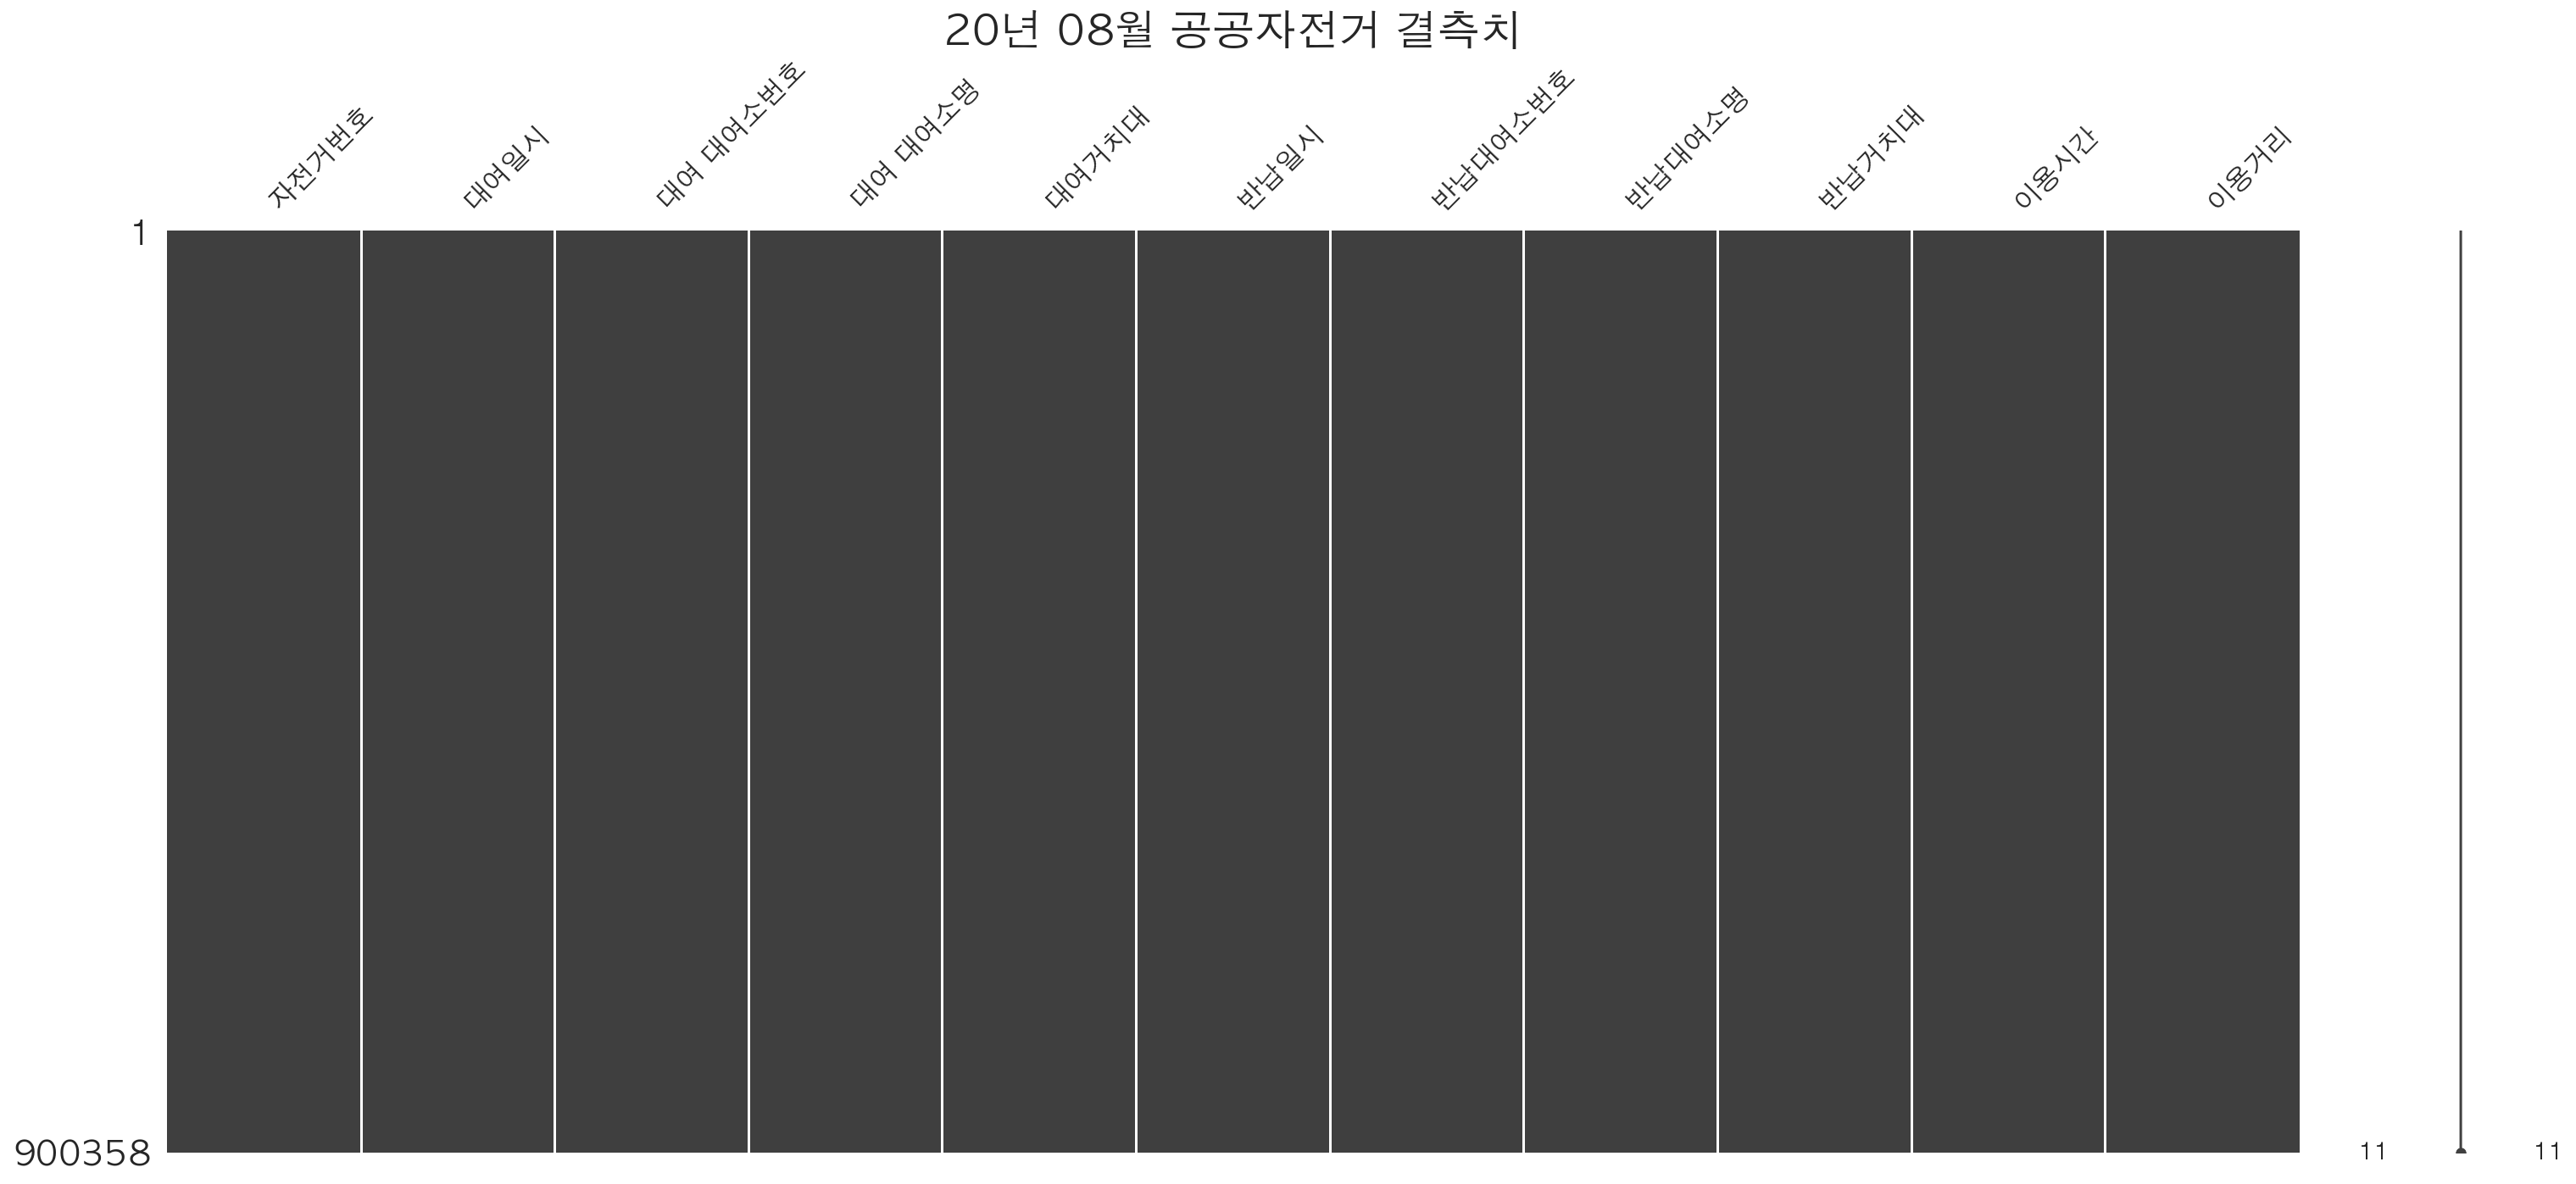

In [27]:
# 20년 08월 데이터 결측치 시각화 
msno.matrix(bike_2008)
plt.title('20년 08월 공공자전거 결측치', fontsize=25)
plt.show()

In [28]:
# 결측치 현황 - 이 데이터는 결측치가 없음
bike_2008.isna().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

In [29]:
bike_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353719 entries, 0 to 1353718
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   자전거번호     1353719 non-null  object 
 1   대여일시      1353719 non-null  object 
 2   대여 대여소번호  1353719 non-null  int64  
 3   대여 대여소명   1353719 non-null  object 
 4   대여거치대     1353719 non-null  int64  
 5   반납일시      1353719 non-null  object 
 6   반납대여소번호   1353719 non-null  int64  
 7   반납대여소명    1353719 non-null  object 
 8   반납거치대     1353719 non-null  int64  
 9   이용시간      1353719 non-null  int64  
 10  이용거리      1353719 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 113.6+ MB


In [30]:
bike_1907.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-21789,2019-07-02 08:35:17,646,장한평역 1번출구 (국민은행앞),4,2019-07-02 08:42:31,3,중랑센터,2,6,1350.0
1,SPB-22363,2019-07-03 08:35:06,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 08:42:28,3,중랑센터,2,7,1160.0
2,SPB-24965,2019-07-03 08:46:07,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 09:09:44,3,중랑센터,14,23,1270.0
3,SPB-21930,2019-07-04 08:49:57,646,장한평역 1번출구 (국민은행앞),4,2019-07-04 09:04:17,3,중랑센터,14,14,1290.0
4,SPB-17709,2019-07-05 08:45:03,529,장한평역 8번 출구 앞,12,2019-07-05 09:11:47,3,중랑센터,14,26,1200.0


In [31]:
bike_1907[['자전거번호']]

,자전거번호
0,SPB-21789
1,SPB-22363
2,SPB-24965
3,SPB-21930
4,SPB-17709
...,...
2082606,SPB-20127
2082607,SPB-23276
2082608,SPB-17321
2082609,SPB-22044


In [32]:
bike_1907['자전거번호'].str.split('-')

0          [SPB, 21789]
1          [SPB, 22363]
2          [SPB, 24965]
3          [SPB, 21930]
4          [SPB, 17709]
               ...     
2082606    [SPB, 20127]
2082607    [SPB, 23276]
2082608    [SPB, 17321]
2082609    [SPB, 22044]
2082610    [SPB, 23900]
Name: 자전거번호, Length: 2082611, dtype: object

In [33]:
bike_1907['자전거번호'].str.split('-', n=1)

0          [SPB, 21789]
1          [SPB, 22363]
2          [SPB, 24965]
3          [SPB, 21930]
4          [SPB, 17709]
               ...     
2082606    [SPB, 20127]
2082607    [SPB, 23276]
2082608    [SPB, 17321]
2082609    [SPB, 22044]
2082610    [SPB, 23900]
Name: 자전거번호, Length: 2082611, dtype: object

In [34]:
# 문자열 나누어 
# 구분자를 기준으로 n개로 나눈다, expand=True이면 여러 컬럼, False이면 1개 컬럼에 리스트
bike_no = bike_1907['자전거번호'].str.split('-', n=1, expand=True)
bike_no.rename(columns={0:"자전거", 1:"자전거고유번호"})

,자전거,자전거고유번호
0,SPB,21789
1,SPB,22363
2,SPB,24965
3,SPB,21930
4,SPB,17709
...,...,...
2082606,SPB,20127
2082607,SPB,23276
2082608,SPB,17321
2082609,SPB,22044


In [35]:
bike_no2 = bike_1907['자전거번호'].str.split('-', n=1, expand=True).rename(columns={0:"자전거", 1:"자전거고유번호"})
bike_no2

,자전거,자전거고유번호
0,SPB,21789
1,SPB,22363
2,SPB,24965
3,SPB,21930
4,SPB,17709
...,...,...
2082606,SPB,20127
2082607,SPB,23276
2082608,SPB,17321
2082609,SPB,22044


In [36]:
bike_1907

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-21789,2019-07-02 08:35:17,646,장한평역 1번출구 (국민은행앞),4,2019-07-02 08:42:31,3,중랑센터,2,6,1350.0
1,SPB-22363,2019-07-03 08:35:06,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 08:42:28,3,중랑센터,2,7,1160.0
2,SPB-24965,2019-07-03 08:46:07,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 09:09:44,3,중랑센터,14,23,1270.0
3,SPB-21930,2019-07-04 08:49:57,646,장한평역 1번출구 (국민은행앞),4,2019-07-04 09:04:17,3,중랑센터,14,14,1290.0
4,SPB-17709,2019-07-05 08:45:03,529,장한평역 8번 출구 앞,12,2019-07-05 09:11:47,3,중랑센터,14,26,1200.0
...,...,...,...,...,...,...,...,...,...,...,...
2082606,SPB-20127,2019-07-19 07:41:34,240,문래역 4번출구 앞,8,2019-07-19 07:51:55,9998,영남주차장 정비센터,10,9,480.0
2082607,SPB-23276,2019-07-19 07:50:48,832,이촌1동 주민센터 뒤,8,2019-07-19 08:32:51,9998,영남주차장 정비센터,12,40,8840.0
2082608,SPB-17321,2019-07-22 12:43:22,266,영등포청과시장 사거리,7,2019-07-22 13:07:29,9998,영남주차장 정비센터,14,23,3320.0
2082609,SPB-22044,2019-07-22 12:43:13,266,영등포청과시장 사거리,9,2019-07-22 13:08:53,9998,영남주차장 정비센터,4,25,2960.0


In [37]:
bike_no2

,자전거,자전거고유번호
0,SPB,21789
1,SPB,22363
2,SPB,24965
3,SPB,21930
4,SPB,17709
...,...,...
2082606,SPB,20127
2082607,SPB,23276
2082608,SPB,17321
2082609,SPB,22044


In [38]:
result1 = pd.concat([bike_1907, bike_no], axis=1, ignore_index=True) # axis -> 컬럼으로 합침 설정 
result1 = result1.rename(columns={0:'자전거고유번호', 1:'대여일시', 2:'대여_대여소번호', 3:'대여_대여소명', 
                        4:'대여거치대', 5:'반납일시', 6:'반납_대여소번호', 7:'반납_대여소명', 8:'반납거치대', 9:'이용시간', 
                        10:'이용거리', 11:'자전거', 12:'자전거번호'})
result1

,자전거고유번호,대여일시,대여_대여소번호,대여_대여소명,대여거치대,반납일시,반납_대여소번호,반납_대여소명,반납거치대,이용시간,이용거리,자전거,자전거번호
0,SPB-21789,2019-07-02 08:35:17,646,장한평역 1번출구 (국민은행앞),4,2019-07-02 08:42:31,3,중랑센터,2,6,1350.0,SPB,21789
1,SPB-22363,2019-07-03 08:35:06,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 08:42:28,3,중랑센터,2,7,1160.0,SPB,22363
2,SPB-24965,2019-07-03 08:46:07,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 09:09:44,3,중랑센터,14,23,1270.0,SPB,24965
3,SPB-21930,2019-07-04 08:49:57,646,장한평역 1번출구 (국민은행앞),4,2019-07-04 09:04:17,3,중랑센터,14,14,1290.0,SPB,21930
4,SPB-17709,2019-07-05 08:45:03,529,장한평역 8번 출구 앞,12,2019-07-05 09:11:47,3,중랑센터,14,26,1200.0,SPB,17709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082606,SPB-20127,2019-07-19 07:41:34,240,문래역 4번출구 앞,8,2019-07-19 07:51:55,9998,영남주차장 정비센터,10,9,480.0,SPB,20127
2082607,SPB-23276,2019-07-19 07:50:48,832,이촌1동 주민센터 뒤,8,2019-07-19 08:32:51,9998,영남주차장 정비센터,12,40,8840.0,SPB,23276
2082608,SPB-17321,2019-07-22 12:43:22,266,영등포청과시장 사거리,7,2019-07-22 13:07:29,9998,영남주차장 정비센터,14,23,3320.0,SPB,17321
2082609,SPB-22044,2019-07-22 12:43:13,266,영등포청과시장 사거리,9,2019-07-22 13:08:53,9998,영남주차장 정비센터,4,25,2960.0,SPB,22044


In [39]:
result2 = result1.drop(['자전거고유번호', '자전거'], axis=1)
result2

,대여일시,대여_대여소번호,대여_대여소명,대여거치대,반납일시,반납_대여소번호,반납_대여소명,반납거치대,이용시간,이용거리,자전거번호
0,2019-07-02 08:35:17,646,장한평역 1번출구 (국민은행앞),4,2019-07-02 08:42:31,3,중랑센터,2,6,1350.0,21789
1,2019-07-03 08:35:06,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 08:42:28,3,중랑센터,2,7,1160.0,22363
2,2019-07-03 08:46:07,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 09:09:44,3,중랑센터,14,23,1270.0,24965
3,2019-07-04 08:49:57,646,장한평역 1번출구 (국민은행앞),4,2019-07-04 09:04:17,3,중랑센터,14,14,1290.0,21930
4,2019-07-05 08:45:03,529,장한평역 8번 출구 앞,12,2019-07-05 09:11:47,3,중랑센터,14,26,1200.0,17709
...,...,...,...,...,...,...,...,...,...,...,...
2082606,2019-07-19 07:41:34,240,문래역 4번출구 앞,8,2019-07-19 07:51:55,9998,영남주차장 정비센터,10,9,480.0,20127
2082607,2019-07-19 07:50:48,832,이촌1동 주민센터 뒤,8,2019-07-19 08:32:51,9998,영남주차장 정비센터,12,40,8840.0,23276
2082608,2019-07-22 12:43:22,266,영등포청과시장 사거리,7,2019-07-22 13:07:29,9998,영남주차장 정비센터,14,23,3320.0,17321
2082609,2019-07-22 12:43:13,266,영등포청과시장 사거리,9,2019-07-22 13:08:53,9998,영남주차장 정비센터,4,25,2960.0,22044


In [40]:
bike_1907 = result2[['자전거번호', '대여일시', '대여_대여소번호', '대여_대여소명', '대여거치대', '반납일시', '반납_대여소번호', 
                   '반납_대여소명', '반납거치대', '이용시간', '이용거리']]
bike_1907

,자전거번호,대여일시,대여_대여소번호,대여_대여소명,대여거치대,반납일시,반납_대여소번호,반납_대여소명,반납거치대,이용시간,이용거리
0,21789,2019-07-02 08:35:17,646,장한평역 1번출구 (국민은행앞),4,2019-07-02 08:42:31,3,중랑센터,2,6,1350.0
1,22363,2019-07-03 08:35:06,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 08:42:28,3,중랑센터,2,7,1160.0
2,24965,2019-07-03 08:46:07,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 09:09:44,3,중랑센터,14,23,1270.0
3,21930,2019-07-04 08:49:57,646,장한평역 1번출구 (국민은행앞),4,2019-07-04 09:04:17,3,중랑센터,14,14,1290.0
4,17709,2019-07-05 08:45:03,529,장한평역 8번 출구 앞,12,2019-07-05 09:11:47,3,중랑센터,14,26,1200.0
...,...,...,...,...,...,...,...,...,...,...,...
2082606,20127,2019-07-19 07:41:34,240,문래역 4번출구 앞,8,2019-07-19 07:51:55,9998,영남주차장 정비센터,10,9,480.0
2082607,23276,2019-07-19 07:50:48,832,이촌1동 주민센터 뒤,8,2019-07-19 08:32:51,9998,영남주차장 정비센터,12,40,8840.0
2082608,17321,2019-07-22 12:43:22,266,영등포청과시장 사거리,7,2019-07-22 13:07:29,9998,영남주차장 정비센터,14,23,3320.0
2082609,22044,2019-07-22 12:43:13,266,영등포청과시장 사거리,9,2019-07-22 13:08:53,9998,영남주차장 정비센터,4,25,2960.0


In [41]:
bike_share_station = bike_1907['대여_대여소명'].value_counts()

In [42]:
bike_share_station

뚝섬유원지역 1번출구 앞        10317
여의나루역 1번출구 앞          9909
봉림교 교통섬               8405
홍대입구역 2번출구 앞          7567
롯데월드타워(잠실역2번출구 쪽)     7349
                     ...  
구룡터널 입구(개포1단지아파트)       28
이동정비                    27
영남단말기정비                  1
상암센터 정비실                 1
서울월드컵경기장 테스트             1
Name: 대여_대여소명, Length: 1541, dtype: int64

In [ ]:
bike_1907['대여_대여소명'].value_counts() / bike_1907['대여_대여소명']

In [46]:
data1 = bike_1907['대여_대여소번호'].value_counts()
data1

502      10317
207       9909
2102      8405
113       7567
1210      7349
         ...  
2391        28
7           27
99999        1
5            1
1687         1
Name: 대여_대여소번호, Length: 1541, dtype: int64

```
1. 자전거 번호 컬럼만 도출
2. 리스트로 형변환
3. split,함수로 열을 두개 나눔 ["SPB", "1230"]
4. 1번째애들만 for문으로 돌림
5. 숫자 range 범위 만들기
6. 함수로 만들기 
```

In [14]:
# bike_1907.sort_values(by='대여일시')
bike_1907[bike_1907['대여일시'] == '2019-07-15 00:00:06']

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
621428,SPB-03648,2019-07-15 00:00:06,1650,중계근린공원내,13,2019-07-15 00:05:00,1616,하계2동 공항버스정류장 옆,1,4,760.0
133208,SPB-05419,2019-07-15 00:00:06,2177,신대방역 2번 출구,19,2019-07-15 00:18:35,2115,관악농협농산물백화점,4,18,2260.0
154799,SPB-20417,2019-07-15 00:00:06,2136,신림역 8번출구,6,2019-07-15 00:07:57,2157,난곡 사거리,3,7,1190.0
